## Observations and Insights 

In [ ]:
#1)	Maximum amount of testing have been done on Capomulin and Ramicane which are 230 mices and 228 mices respectively. Distribution amongst the sex in mice is almost Equal. 
#2)	We further drilled in to 4 drug regimen which are Capomulin, Ramicane, Infubinol, and Ceftamin and realized least amount of tumor volumes were found in Capomulin & Ramicane. Average tumor volumes are 41 mm3 for Capomulin, 40 mm3 for Ramicane, 53 mm3 for Infubinol and 53 for Ceftamin.  
#3)	Then we drilled further in Capomulin and analyzed tumor volume against Mice ‘b128’. Tumor volume was pretty steady compared to the time (seconds). Tumor Volumes ware in 40’s mm3 which time (seconds) ranged from 0 to 45 seconds. We found a positive correlation 0.84 between weight and tumor. Higher the weight and therefore higher tumor volume.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice."Mouse ID"]
numberofmice = combined_data["Mouse ID"].nunique()

numberofmice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data[combined_data[['Mouse ID', 'Timepoint']].duplicated() == True]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
combined_data.loc[combined_data['Mouse ID']=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_DF= combined_data.loc[combined_data['Mouse ID']!="g989"]

clean_DF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
numberofmice1 = clean_DF["Mouse ID"].nunique()
numberofmice1

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#clean_DF['Tumor Volume (mm3)'].mean()
#clean_DF['Tumor Volume (mm3)'].median()
#clean_DF['Tumor Volume (mm3)'].std()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
Stattable1=clean_DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Stattable2=clean_DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Stattable3=clean_DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Stattable4=clean_DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Stattable5=clean_DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

stattable=pd.DataFrame(
    {"Mean": Stattable1,"Median": Stattable2, "Variance": Stattable3, "Standard Deviation" : Stattable4, "Standard Error" : Stattable5  }
     )
stattable


,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summarytable=clean_DF.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]}) 
summarytable

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
micetested = clean_DF['Drug Regimen'].value_counts()

micetested

#mice=pd.DataFrame(
    #{"Total Count": Gencount,"Percentage of Players": Gencount_percent  }
     #)



Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

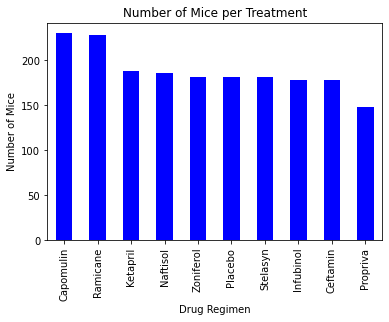

In [10]:
plot_pandas = micetested.plot.bar(color='b')  

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

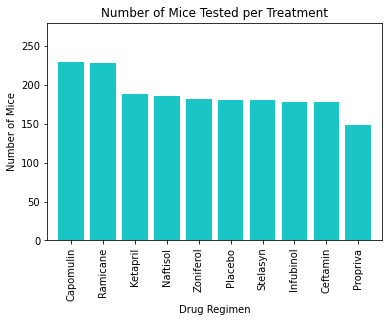

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = micetested.index.values
y_axis = micetested.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='c', alpha=0.9, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+50)
plt.show()


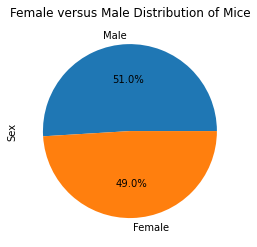

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using panda
malefemale = clean_DF["Sex"].value_counts()
sex_pie=malefemale.plot(kind='pie', y='Sex', title='Female versus Male Distribution of Mice',autopct= "%1.1f%%")
plt.show()

([<matplotlib.patches.Wedge at 0x1b91ba2f190>,
 [Text(-0.7420901026827221, -0.9430282495770459, 'male'),
  Text(0.6802492607924954, 0.864442562112292, 'Female')],
 [Text(-0.4328858932315879, -0.5500998122532768, '51.0%'),
  Text(0.37104505134136107, 0.47151412478852284, '49.0%')])

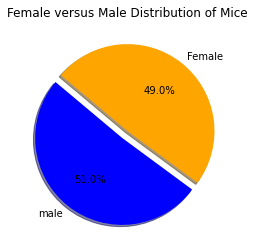

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["male", "Female"]
sizes = [51, 49]
colors = ["blue", "orange"]
explode = (0.1, 0)
plt.title("Female versus Male Distribution of Mice")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_DF.loc[clean_DF['Drug Regimen'] == 'Capomulin']

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame({'Timepoint': Capomulin_last})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, clean_DF, on=("Mouse ID","Timepoint"),how="left")                      

Capomulin_merge




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [15]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]
quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
Ramicane_df = clean_DF.loc[clean_DF['Drug Regimen'] == 'Ramicane']

# Start by getting the last (greatest) timepoint for each mouse
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame({'Timepoint': Ramicane_last})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ramicane_merge = pd.merge(Ramicane_vol, clean_DF, on=("Mouse ID","Timepoint"),how="left")                      

Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [17]:
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
Infubinol_df = clean_DF.loc[clean_DF["Drug Regimen"] == "Infubinol"]

# Start by getting the last (greatest) timepoint for each mouse
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame({'Timepoint': Infubinol_last})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Infubinol_merge = pd.merge(Infubinol_vol, clean_DF, on=("Mouse ID","Timepoint"),how="left")                      

Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [19]:
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
Ceftamin_df = clean_DF.loc[clean_DF["Drug Regimen"] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame({'Timepoint': Infubinol_last})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_DF, on=("Mouse ID","Timepoint"),how="left")                      

Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [21]:
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [22]:

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = clean_DF[clean_DF["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    if treatment == 0:
        print(f"NIL")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    treatment+=1

NIL
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
The lower quartile of Ceftamin treatments is: 48.72
The upper quartile of Ceftamin treatments is: 64.3
The interquartile range of Ceftamin treatments is: 15.58
Values below 25.35 could be Ceftamin outliers.
Values above 87.6

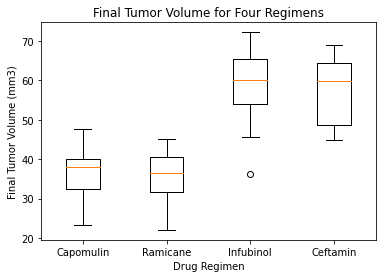

In [24]:
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = boxplot_list
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Four Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)
plt.show()


## Line and Scatter Plots

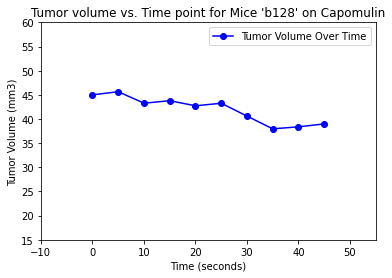

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#rows where the mice are treated with capomulin.
Capomulin_df = clean_DF.loc[clean_DF['Drug Regimen'] == 'Capomulin']
Capmice_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == "b128",:]

Capmice_df
plt.title("Tumor volume vs. Time point for Mice 'b128' on Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (seconds)")
plt.ylim(15,60)
plt.xlim(-10,55)
plt.plot(Capmice_df["Timepoint"], Capmice_df["Tumor Volume (mm3)"] ,color="blue",marker="o", label="Tumor Volume Over Time")
plt.legend()
plt.show()

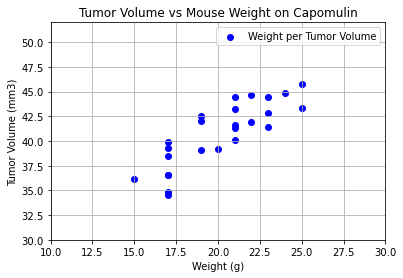

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df

avg_df = Capomulin_df.groupby("Mouse ID").mean()
avg_df

# get averages for weight and tumor volume
x_axis=avg_df["Weight (g)"]
y_axis=avg_df["Tumor Volume (mm3)"]

#get the plot data
plt.title("Tumor Volume vs Mouse Weight on Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(30,52)
plt.xlim(10,30)


plt.scatter(x_axis, y_axis, marker="o", color ="blue", label='Weight per Tumor Volume')
plt.plot()
plt.legend()
plt.grid()
plt.show()



Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 

correlation=st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between both factors is 0.84


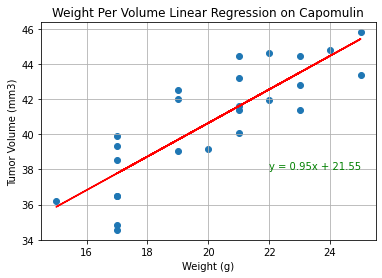

In [28]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Weight Per Volume Linear Regression on Capomulin")
plt.annotate(line_eq,(22,38),fontsize=10,color="green")
plt.grid()
plt.show()